In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [11]:
X=df.drop(columns=["Exited"])
Y=df['Exited']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [15]:
X_train.shape

(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model=Sequential()

In [60]:
model.add(Dense(11,activation='relu',input_dim=11)) 
# model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid')) 

F:\okok\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144 (576.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) #binary_crossentropy is same as log_loss
#optimizer is used for our gradient descent algo
#metrics allows to see accuracy at each epoch

In [63]:
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)
#both validation_loss and accuracy should decrease and if only validation is decreasing then it is considered as a case of overfitting

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3008 - loss: 1.0232 - val_accuracy: 0.6025 - val_loss: 0.6507
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6903 - loss: 0.5926 - val_accuracy: 0.7894 - val_loss: 0.5165
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7862 - loss: 0.5010 - val_accuracy: 0.8037 - val_loss: 0.4683
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8158 - loss: 0.4477 - val_accuracy: 0.8081 - val_loss: 0.4450
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.4298 - val_accuracy: 0.8163 - val_loss: 0.4307
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8259 - loss: 0.4249 - val_accuracy: 0.8213 - val_loss: 0.4205
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8273 - loss: 0.4113 - val_accuracy: 0.8244 - val_loss: 0.4119
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8292 - loss: 0.4021 - val_accu

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8556 - loss: 0.3402 - val_accuracy: 0.8562 - val_loss: 0.3426
Epoch 52/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3354 - val_accuracy: 0.8550 - val_loss: 0.3432
Epoch 53/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.3520 - val_accuracy: 0.8537 - val_loss: 0.3450
Epoch 54/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8580 - loss: 0.3419 - val_accuracy: 0.8556 - val_loss: 0.3433
Epoch 55/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.3301 - val_accuracy: 0.8550 - val_loss: 0.3430
Epoch 56/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3283 - val_accuracy: 0.8531 - val_loss: 0.3432
Epoch 57/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8630 - loss: 0.3306 - val_accuracy: 0.8550 - val_loss: 0.3431
Epoch 58/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8572 - loss: 0.3364 - val_accuracy:

In [64]:
model.layers[0].get_weights()

[array([[ 4.16029602e-01, -3.39403227e-02,  1.52509749e-01,
         -2.13505670e-01,  5.92064559e-01,  1.34546207e-02,
          1.24984734e-01, -1.56904772e-01, -4.32585716e-01,
         -3.33628297e-01, -2.14068100e-01],
        [ 1.67204857e-01, -1.64191931e-01, -8.40590298e-01,
         -9.96054173e-01,  3.51607472e-01, -2.82320976e-01,
          1.17071532e-01,  5.69472492e-01,  3.04228425e-01,
         -4.23618585e-01,  3.70647192e-01],
        [ 2.65465647e-01, -1.46325588e-01, -1.05711535e-01,
         -2.91553140e-02, -4.29261059e-01,  1.07610211e-01,
         -2.34314248e-01,  2.24293679e-01, -1.83881164e-01,
         -1.46136180e-01,  5.82966924e-01],
        [ 7.98816085e-02, -9.05375361e-01, -1.79852664e-01,
          8.95943493e-02,  1.96701884e-01,  2.23185644e-01,
          3.38466197e-01, -2.36331627e-01,  2.77690649e-01,
          8.41501653e-02, -5.83161652e-01],
        [-8.49763393e-01, -1.14935577e+00, -5.18935849e-04,
          2.62828946e-01, -8.92611817e-02,  

In [65]:
model.layers[1].get_weights()

[array([[ 0.79793245],
        [ 1.0981323 ],
        [-1.2314612 ],
        [-0.67572784],
        [-0.27572083],
        [ 1.6766906 ],
        [ 0.9583792 ],
        [-0.48528156],
        [ 0.48012078],
        [ 0.49539363],
        [-0.36239365]], dtype=float32),
 array([-0.47398698], dtype=float32)]

In [66]:
y_log = model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.02661025],
       [0.07094077],
       [0.06002372],
       ...,
       [0.0179486 ],
       [0.02629523],
       [0.36249897]], dtype=float32)

In [67]:
y_pred = np.where(y_log>0.5,1,0)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8615

In [69]:
history.history

{'accuracy': [0.39937499165534973,
  0.7373437285423279,
  0.801562488079071,
  0.8107812404632568,
  0.8199999928474426,
  0.8274999856948853,
  0.8299999833106995,
  0.8315625190734863,
  0.8396875262260437,
  0.8435937762260437,
  0.8479687571525574,
  0.850781261920929,
  0.8518750071525574,
  0.8532812595367432,
  0.8550000190734863,
  0.8573437333106995,
  0.85546875,
  0.859375,
  0.8581249713897705,
  0.8582812547683716,
  0.8589062690734863,
  0.859375,
  0.8592187762260437,
  0.8584374785423279,
  0.8603125214576721,
  0.859375,
  0.8610937595367432,
  0.8596875071525574,
  0.8603125214576721,
  0.8584374785423279,
  0.8607812523841858,
  0.8610937595367432,
  0.8600000143051147,
  0.8598437309265137,
  0.8600000143051147,
  0.8614062666893005,
  0.8618749976158142,
  0.8610937595367432,
  0.859375,
  0.8607812523841858,
  0.8607812523841858,
  0.8621875047683716,
  0.8610937595367432,
  0.8614062666893005,
  0.8610937595367432,
  0.8628125190734863,
  0.8617187738418579,
  0

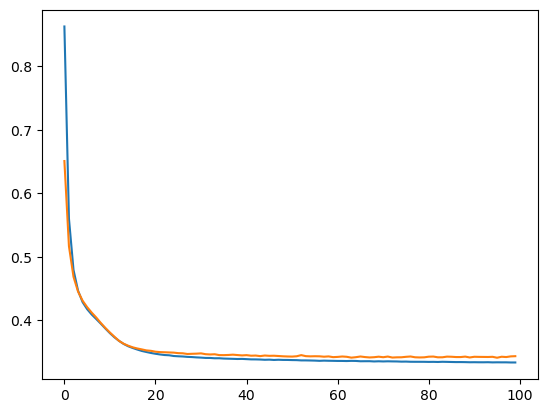

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [71]:
#This gap will show the level of overfitting done in the model.

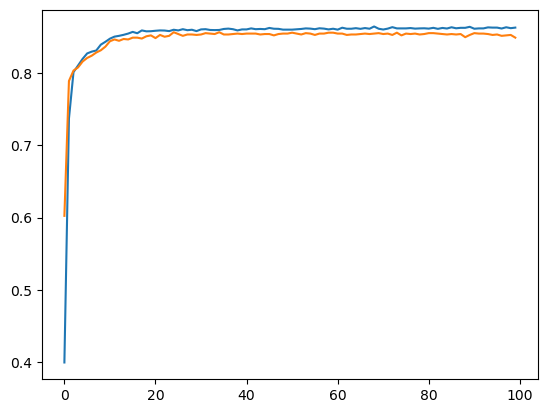

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])